# Stock Price Prediction using LSTM Neural Networks

### 1. **Introduction**

The goal of this project is to predict Google’s stock price using historical data and a Long Short-Term Memory (LSTM) neural network, a specific type of recurrent neural network (RNN). LSTMs are particularly effective for time series prediction due to their ability to learn long-term dependencies. We use the ```yfinance``` library to fetch historical stock data and train the model on the ```Close``` prices.

In [9]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\udval\myenv\Scripts\python.exe -m pip install --upgrade pip


In [10]:
pip install numpy pandas scikit-learn tensorflow

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp310-cp310-win_amd64.whl.metadata (6.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\udval\myenv\Scripts\python.exe -m pip install --upgrade pip


In [14]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -------------------------------- ----- 143.4/167.0 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 2.5 MB/s eta 0:00:00
  Using cached pillow-10.4.0-cp310-cp310-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.4/7.8 MB 8.7 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/7.8 MB 15.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/7.8 MB 17.5 MB/s eta 0:00:01
   ------------------ --------------------- 3.5/7.8 MB 18.8 MB/s eta 0:00:01
   ------------------------ --------------- 4.8/7.8 MB 21.8 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 20.4 MB/s eta 0:00:01
   ------------------------------------- -- 7.2/7.8 MB 22.1 MB/s eta 0:00:01
   --------------------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\udval\myenv\Scripts\python.exe -m pip install --upgrade pip


In [131]:
#Importing Libraries and Data
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Data Collection

To begin, we download Google stock data using the ```yfinance``` API for a specified time range.

In [132]:
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [133]:
#Get Google stock information
stock = "GOOG"
# Download stock data from Yahoo Finance, focusing only on 'Close' prices
google_data = yf.download(stock, start=start, end=end)[['Close']]

[*********************100%***********************]  1 of 1 completed


In [134]:
# Inspecting the first few rows
google_data.head()

,Close
Date,
2004-10-05,3.446332
2004-10-06,3.414203
2004-10-07,3.458287
2004-10-08,3.430392
2004-10-11,3.368873


- For this project, we are only focusing on ```Close``` price as it reflects the stock's final orice for the day, making it a good indicator for long-term trends (*Other columns like 'Open', 'High', and 'Low' are typically more volatile and not necessary for this simplified model.*).

### 3. Data Exploration and Visualization

In [135]:
google_data.describe()

,Close
count,5035.000000
mean,46.644890
std,44.638960
min,3.368873
25%,13.148964
50%,27.440163
75%,61.561249
max,192.660004


In [136]:
# Check for missing values
google_data.isna().sum()

Close    0
dtype: int64

#### Plotting the Closing Prices

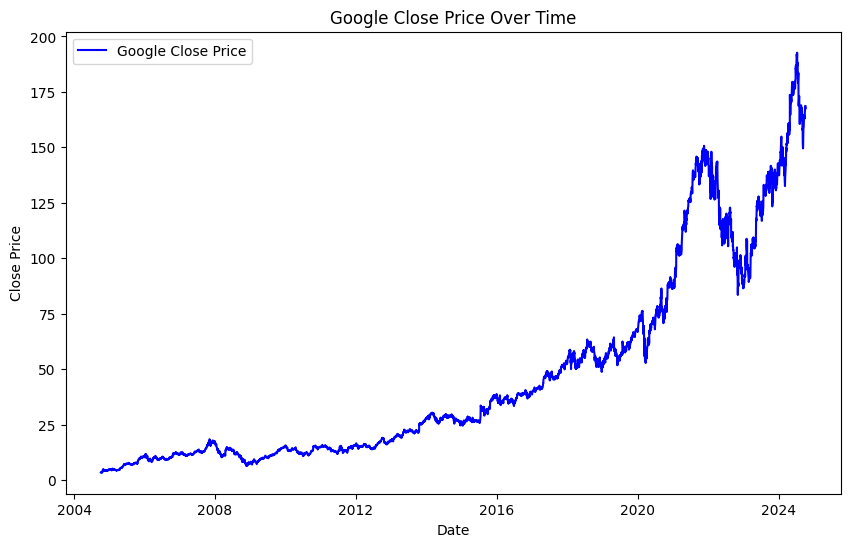

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(google_data.index, google_data['Close'], color='blue', label='Google Close Price')
plt.title("Google Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

This plot allows us to observe the stock price trend over time. From the graph, we can observe significant fluctuations in Google's stock prices, including upward and downward trends. These trends will form the basis for our predictions.

### 4. Calculate Moving Average (MA)

We calculate the Moving Average (e.g., 250-day MA) to smooth out daily fluctuations and identify the trend. A 250-day moving average represents a longer-term trend, giving us insight into overall stock movement over a year (MA_250 helps understand yearly trends). 

C:\Users\udval\AppData\Local\Temp\ipykernel_16256\4026983063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data['MA_250'] = google_data['Close'].rolling(window=250).mean()


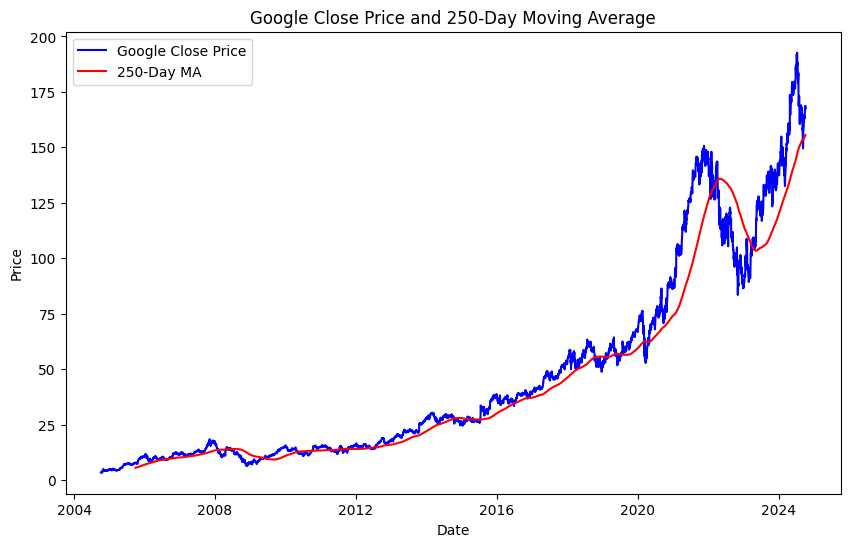

In [138]:
# Calculate 250-day Moving Average (MA) to smooth the data
google_data['MA_250'] = google_data['Close'].rolling(window=250).mean()

# Plot the Close price and the Moving Average (MA)
plt.figure(figsize=(10, 6))
plt.plot(google_data.index, google_data['Close'], color='blue', label='Google Close Price')
plt.plot(google_data.index, google_data['MA_250'], color='red', label='250-Day MA')
plt.title("Google Close Price and 250-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

The 250-day Moving Average helps smooth the fluctuations and provides a clearer view of the stock's longer-term trend. We use this to identify/understand whether the stock is in an uptrend or downtrend.

From the plot, we see that the 250-day MA line is less volatile compared to the 'Close' price, indicating that it captures the stock's overall movement over a longer period.

### 5. Training and Test Splitting
We'll split the data into training and testing sets to train the model on historical data and test it on unseen data.

In [139]:
# Split data into training (80%) and testing (20%)
train_size = int(len(google_data) * 0.8)
train_data = google_data[:train_size]
test_data = google_data[train_size:]

train_data.shape, test_data.shape

((4028, 2), (1007, 2))

We split the data into training and testing sets, where 80% of the data is used to train the model, and the remaining 20% is for testing how well the model generalizes to unseen data.

### 6. Scaling the Data

In [140]:
# Scale the Close price to be between 0 and 1 for better performance in training
# Scale only the 'Close' column, ensuring it's a 2D array
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

By scaling the ```Close``` prices, it ensures that the model treats all input values equally without one dominating because of larger numerical ranges. Without scaling, larger numbers can disproportionately influence the model, leading to suboptimal predictions. Normalization makes training faster and more efficient.

### 7. Create Sequences for LSTM Model

In [141]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Set the window size (e.g., 60 days of historical data)
window_size = 60

# Create sequences
X_train, y_train = create_sequences(scaled_train_data, window_size)
X_test, y_test = create_sequences(scaled_test_data, window_size)

LSTM models require sequential data. We create sequences of 60 days of historical data (i.e., 60 previous days of stock prices) to predict the stock price on the 61st day.

### 8. Build and Train the LSTM Model

In [142]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [143]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20


C:\Users\udval\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0188
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0013
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0012
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0013
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0011
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0011
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 9.0286e-04
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 9.1685e-04
Epoch 9/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 9.8492e-04
Epoch 10/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 7.4287e-04
Epoch 11/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 9.0009e-04
Epoch 12/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 7.6156e-04
Epoch 13/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 7.7353e-04
Epoch 14/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 7.1846e-04
Epoch 15/20
124/124 ━━

- The LSTM (Long Short-Term Memory) network is ideal for time series prediction tasks like stock prices due to its ability to remember long-term dependencies.
- We use two LSTM layers with Dropout to prevent overfitting and a Dense output layer to predict the stock price.

### 9. Making Predictions 

In [144]:
# Make predictions on the test set
predicted_stock_price = model.predict(X_test)

# Inverse the scaling
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Reshape test data to compare with predictions
actual_stock_price = scaler.inverse_transform(scaled_test_data[window_size:])

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


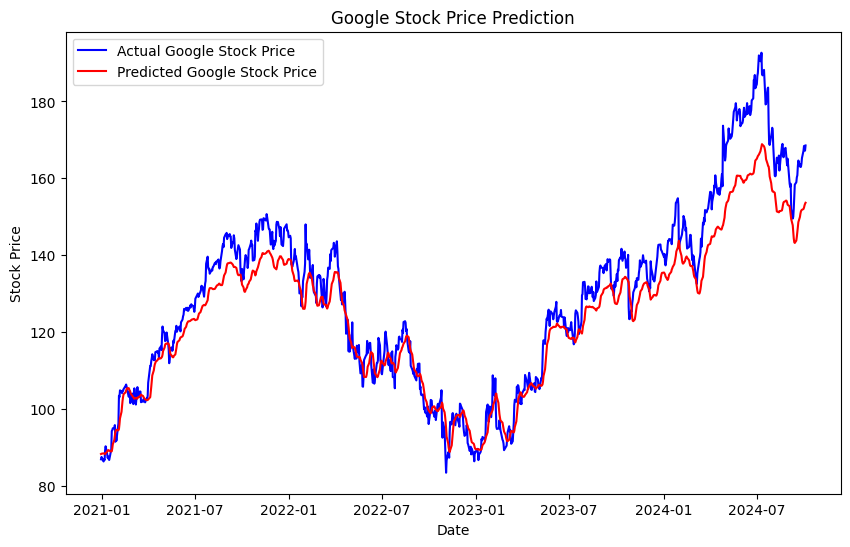

In [145]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(google_data.index[train_size + window_size:], actual_stock_price, color='blue', label='Actual Google Stock Price')
plt.plot(google_data.index[train_size + window_size:], predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

From the plot, we observe the 'Close' price trend for Google's stock over the given time period. The ```Close``` price represents the final trading price of the stock for each day. 

In [146]:
model.save("Latest_stock_price_model.keras")